# ML Capstone Project
### Predicting Trends in Life Choices Freedom: An Analysis of World Happiness Report Data

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder 

In this capstone project, I will complete the following tasks:

1. Build DataFrame
2. Define ML Problem
3. Perform exploratory data analysis to understand the data.
4. Define Project Plan
5. Implement Project Plan:
    * Prepare data for the model.
    * Fit the model to the training data and evaluate the model.
    * Improve model's performance.

## Part 1: Build DataFrame

In [2]:
# File names of the four data sets
WHRDataSet_filename = os.path.join(os.getcwd(), "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(WHRDataSet_filename)

## Part 2: Define ML Problem

1. I have chosen the World Happiness Report (WHR) data set: WHR2018Chapter2OnlineData.csv.

2. I will be predicting the trend of the freedom to make life choices and the factors that influence it. The label is 'Freedom to make life choices.'
3. This is a supervised learning problem. This is a regression problem.
4. The features are 'country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'.
5. Predicting the factors that influence "Freedom to make life choices" are good for the companies to inform market entry strategies, optimize workforce management, and improve product development. By understanding these factors, the companies will be able target regions with higher economic stability and growth potential, tailor human resources policies to improve employee satisfaction, and design Corporate Social Responsibility initiatives that effectively address local needs. 

## Part 3: Understand Data

The next step is to perform exploratory data analysis.

In [3]:
# Inspect the data
print(df.shape)
print(df.columns)
df.head(10)

(1562, 19)
Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [4]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [5]:
# Inspect the label column
df['Freedom to make life choices']

0       0.718114
1       0.678896
2       0.600127
3       0.495901
4       0.530935
          ...   
1557    0.575884
1558    0.642034
1559    0.667193
1560    0.732971
1561    0.752826
Name: Freedom to make life choices, Length: 1562, dtype: float64

In [6]:
# Rename the label column
df.rename(columns={'Freedom to make life choices': 'freedom'}, inplace=True)

In [7]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [8]:
df['freedom'].unique()[:15]

array([0.71811432, 0.67889637, 0.60012722, 0.49590141, 0.53093505,
       0.57795536, 0.50851405, 0.38892758, 0.5225662 , 0.42701086,
       0.52860475, 0.52522325, 0.5689584 , 0.48749626, 0.60151213])

In [9]:
# Handle the outliers
val = np.percentile(df['freedom'], 1)
import scipy.stats as stats
df['label_freedom'] = stats.mstats.winsorize(df['freedom'], limits = [0.01, 0.01])

In [10]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year",label_freedom
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,0.718114
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.678896
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.600127
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,0.495901
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,0.530935


In [11]:
# Check that the values of `freedom` and `label_freedom` are not identical
(df['freedom']-df['label_freedom']).unique()

array([ 0.        ,         nan, -0.02264026, -0.10667211, -0.03089383,
       -0.10413662, -0.05807403, -0.06959414, -0.082748  , -0.06066552,
       -0.01679188, -0.04964131, -0.03176981, -0.02898228, -0.0064494 ,
       -0.07739154, -0.02064988])

In [12]:
# Handle missing data
nan_count = np.sum(df.isnull(), axis=0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
freedom                                                      29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [13]:
nan_detected = nan_count != 0
nan_detected

country                                                     False
year                                                        False
Life Ladder                                                 False
Log GDP per capita                                           True
Social support                                               True
Healthy life expectancy at birth                             True
freedom                                                      True
Generosity                                                   True
Perceptions of corruption                                    True
Positive affect                                              True
Negative affect                                              True
Confidence in national government                            True
Democratic Quality                                           True
Delivery Quality                                             True
Standard deviation of ladder by country-year                False
Standard d

In [14]:
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

country                                                     False
year                                                         True
Life Ladder                                                  True
Log GDP per capita                                           True
Social support                                               True
Healthy life expectancy at birth                             True
freedom                                                      True
Generosity                                                   True
Perceptions of corruption                                    True
Positive affect                                              True
Negative affect                                              True
Confidence in national government                            True
Democratic Quality                                           True
Delivery Quality                                             True
Standard deviation of ladder by country-year                 True
Standard d

In [15]:
to_impute = is_int_or_float & nan_detected
to_impute

country                                                     False
year                                                        False
Life Ladder                                                 False
Log GDP per capita                                           True
Social support                                               True
Healthy life expectancy at birth                             True
freedom                                                      True
Generosity                                                   True
Perceptions of corruption                                    True
Positive affect                                              True
Negative affect                                              True
Confidence in national government                            True
Democratic Quality                                           True
Delivery Quality                                             True
Standard deviation of ladder by country-year                False
Standard d

In [16]:
df.columns[to_impute]

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'freedom', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year',
       'label_freedom'],
      dtype='object')

In [17]:
exclude_columns = [
    'country', 
    'year', 
    'Life Ladder', 
    'Standard deviation of ladder by country-year', 
    'Standard deviation/Mean of ladder by country-year'
]

to_impute_selected = df.loc[:, ~df.columns.isin(exclude_columns)]

In [18]:
# Create dummy variables
for col in to_impute_selected:
    df[col + '_na'] = df[col].isnull()

In [19]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth', 'freedom',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year',
       'label_freedom', 'Log GDP per capita_na', 'Social support_na',
       'Healthy life expectancy at birth_na', 'freedom_na', 'Generosity_na',
       'Perceptions of corruption_na', 'Positive affect_na',
       'Negative affect_na', 'Confidence in national government_na',
       'Democratic Quality_na', 'Delivery Quality_na',
       'GINI index (World Bank estimate)_na',
       'GINI index (W

In [20]:
# Replacing the missing values with mean values of the column
column_means = df.mean()

for col in to_impute_selected:
    df[col].fillna(column_means[col], inplace=True)

/tmp/ipykernel_2160/2761165619.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df.mean()


In [21]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

Log GDP per capita missing values count :0
Social support missing values count :0
Healthy life expectancy at birth missing values count :0
freedom missing values count :0
Generosity missing values count :0
Perceptions of corruption missing values count :0
Positive affect missing values count :0
Negative affect missing values count :0
Confidence in national government missing values count :0
Democratic Quality missing values count :0
Delivery Quality missing values count :0
GINI index (World Bank estimate) missing values count :0
GINI index (World Bank estimate), average 2000-15 missing values count :0
gini of household income reported in Gallup, by wp5-year missing values count :0
label_freedom missing values count :0


In [22]:
# Identify the feature to be one-hot encoded
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['country']

In [23]:
# Find the number of unique values each column in `to_encode` has
unique_values_count = {}

for col in to_encode:
    unique_values_count[col] = df[col].nunique()
    
unique_values_count

{'country': 164}

In [24]:
# One-hot encode the feature
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
enc = OneHotEncoder(sparse_output=False)

# Apply the encoder
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]), columns=enc.get_feature_names_out(to_encode))

In [25]:
df_enc.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Resintate the original column names
df_enc.columns = enc.get_feature_names_out(['country'])
df_enc.columns

Index(['country_Afghanistan', 'country_Albania', 'country_Algeria',
       'country_Angola', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahrain',
       ...
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan',
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=164)

In [27]:
df_enc.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Remove the original columns
df.drop(columns=to_encode, axis=1, inplace=True)
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Perceptions of corruption_na,Positive affect_na,Negative affect_na,Confidence in national government_na,Democratic Quality_na,Delivery Quality_na,GINI index (World Bank estimate)_na,"GINI index (World Bank estimate), average 2000-15_na","gini of household income reported in Gallup, by wp5-year_na",label_freedom_na
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,...,False,False,False,False,False,False,True,True,True,False
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,...,False,False,False,False,False,False,True,True,False,False
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,...,False,False,False,False,False,False,True,True,False,False
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,...,False,False,False,False,False,False,True,True,False,False
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,...,False,False,False,False,False,False,True,True,False,False


In [29]:
# Join the transformed features contained in df_enc with df
df = df_enc.join(df)

In [30]:
df.columns

Index(['country_Afghanistan', 'country_Albania', 'country_Algeria',
       'country_Angola', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahrain',
       ...
       'Perceptions of corruption_na', 'Positive affect_na',
       'Negative affect_na', 'Confidence in national government_na',
       'Democratic Quality_na', 'Delivery Quality_na',
       'GINI index (World Bank estimate)_na',
       'GINI index (World Bank estimate), average 2000-15_na',
       'gini of household income reported in Gallup, by wp5-year_na',
       'label_freedom_na'],
      dtype='object', length=198)

In [31]:
# Drop the _na columns
columns_to_drop = df.filter(like='_na').columns
df = df.drop(columns=columns_to_drop)

In [32]:
# Exploratory data analysis
corr_matrix = round(df.corr(),5)
corr_matrix

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year",label_freedom
country_Afghanistan,1.00000,-0.00644,-0.00498,-0.00407,-0.00706,-0.00706,-0.00676,-0.00644,-0.00706,-0.00611,...,0.03657,-0.03546,-0.15594,-0.11633,-0.06440,0.04278,0.00000,-0.00000,-0.04648,-0.10388
country_Albania,-0.00644,1.00000,-0.00498,-0.00407,-0.00706,-0.00706,-0.00676,-0.00644,-0.00706,-0.00611,...,0.03846,-0.02193,0.01738,-0.02076,0.04890,0.04679,-0.01258,-0.08525,0.03731,-0.05814
country_Algeria,-0.00498,-0.00498,1.00000,-0.00315,-0.00546,-0.00546,-0.00523,-0.00498,-0.00546,-0.00473,...,0.00142,-0.00000,-0.06052,-0.04373,-0.02749,-0.02838,-0.01896,-0.08742,0.03095,-0.05604
country_Angola,-0.00407,-0.00407,-0.00315,1.00000,-0.00446,-0.00446,-0.00427,-0.00407,-0.00446,-0.00386,...,0.05330,-0.02324,-0.03791,-0.06490,0.02909,0.05426,0.00000,0.02575,0.01894,-0.09716
country_Argentina,-0.00706,-0.00706,-0.00546,-0.00446,1.00000,-0.00774,-0.00741,-0.00706,-0.00774,-0.00670,...,0.01054,-0.03880,0.03165,-0.04346,0.01921,-0.04486,0.09340,0.09950,-0.06827,0.01459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Standard deviation/Mean of ladder by country-year,0.04278,0.04679,-0.02838,0.05426,-0.04486,0.06739,-0.10755,-0.09796,-0.02602,-0.02158,...,0.51941,-0.01671,-0.42343,-0.51962,0.71207,1.00000,0.15587,0.28623,0.40322,-0.36869
GINI index (World Bank estimate),0.00000,-0.01258,-0.01896,0.00000,0.09340,-0.08592,-0.00647,-0.07196,-0.00761,0.00000,...,0.09346,0.00649,-0.18348,-0.23238,0.24868,0.15587,1.00000,0.67035,0.16758,0.02656
"GINI index (World Bank estimate), average 2000-15",-0.00000,-0.08525,-0.08742,0.02575,0.09950,-0.06909,-0.04723,-0.08467,-0.17653,-0.00000,...,0.06885,0.04730,-0.17643,-0.27152,0.32657,0.28623,0.67035,1.00000,0.37188,0.05336
"gini of household income reported in Gallup, by wp5-year",-0.04648,0.03731,0.03095,0.01894,-0.06827,-0.02410,-0.00938,-0.07679,-0.09548,-0.03316,...,0.13472,0.15327,-0.11621,-0.12298,0.28614,0.40322,0.16758,0.37188,1.00000,0.09399


In [33]:
corrs = corr_matrix['label_freedom']
corrs

country_Afghanistan                                        -0.10388
country_Albania                                            -0.05814
country_Algeria                                            -0.05604
country_Angola                                             -0.09716
country_Argentina                                           0.01459
                                                             ...   
Standard deviation/Mean of ladder by country-year          -0.36869
GINI index (World Bank estimate)                            0.02656
GINI index (World Bank estimate), average 2000-15           0.05336
gini of household income reported in Gallup, by wp5-year    0.09399
label_freedom                                               1.00000
Name: label_freedom, Length: 183, dtype: float64

In [34]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

label_freedom                                        1.00000
freedom                                              0.99922
Positive affect                                      0.61233
Life Ladder                                          0.52449
Delivery Quality                                     0.45539
                                                      ...   
country_Haiti                                       -0.15454
country_Bosnia and Herzegovina                      -0.15685
Negative affect                                     -0.28064
Standard deviation/Mean of ladder by country-year   -0.36869
Perceptions of corruption                           -0.48828
Name: label_freedom, Length: 183, dtype: float64

In [35]:
filtered_corrs = corrs_sorted.drop(labels=['label_freedom', 'freedom'])
top_two_corr = list(filtered_corrs.head(2).index)
top_two_corr

['Positive affect', 'Life Ladder']

In [36]:
df_corrs = df[['label_freedom'] + top_two_corr]
df_corrs

,label_freedom,Positive affect,Life Ladder
0,0.718114,0.517637,3.723590
1,0.678896,0.583926,4.401778
2,0.600127,0.618265,4.758381
3,0.495901,0.611387,3.831719
4,0.530935,0.710385,3.782938
...,...,...,...
1557,0.575884,0.711885,4.690188
1558,0.642034,0.725214,4.184451
1559,0.667193,0.715079,3.703191
1560,0.732971,0.737636,3.735400


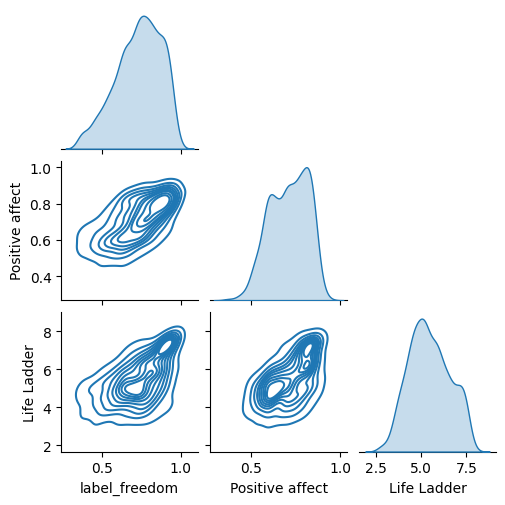

In [37]:
sns.pairplot(df_corrs, kind='kde', corner=True, height=1.7)

In [38]:
# Define the label and features
y = df['freedom']
X = df.drop(columns='freedom', axis=1)

## Part 4: Define Project Plan

1. Now I have a new feature list based on the results of EDA. \
The new feature list is ['Positive affect',
 'Life Ladder',
 'Delivery Quality',
 'Democratic Quality',
 'Social support',
 'Confidence in national government',
 'Log GDP per capita',
 'Generosity',
 'Healthy life expectancy at birth',
 'Standard deviation/Mean of ladder by country-year',
 'Perceptions of corruption']\
I keep the features that have correlation that is >=0.3 with the label.

2. During data preparation, I did handling outliers, handling missing data, one-hot encoding, and visualizing the correlations between the features and the label.\
To prepare data for modeling, handling outliers involves identifying and managing extreme values that could skew results, while handling missing data ensures that gaps are addressed, either by imputation or removal. One-hot encoding transforms categorical variables into a format suitable for models by creating binary columns for each category. Visualizing correlations helps understand the relationships between features and the target variable, which can guide feature selection and engineering.

3. I choose the kNN model.

4. To train my model, I will split the data into training and test data sets, calculate RMSE and R2 values to evaluate the performance of the kNeighborsRegressor model, then improve the model through cross-validation and choosing the optimized kNN model.

In [39]:
# Modify the feature list
features = filtered_corrs[(filtered_corrs >= 0.3) | (filtered_corrs <= -0.3)].index.tolist()
features

['Positive affect',
 'Life Ladder',
 'Delivery Quality',
 'Democratic Quality',
 'Social support',
 'Confidence in national government',
 'Log GDP per capita',
 'Generosity',
 'Healthy life expectancy at birth',
 'Standard deviation/Mean of ladder by country-year',
 'Perceptions of corruption']

In [40]:
# Redefine the features
X = df[features]
X

,Positive affect,Life Ladder,Delivery Quality,Democratic Quality,Social support,Confidence in national government,Log GDP per capita,Generosity,Healthy life expectancy at birth,Standard deviation/Mean of ladder by country-year,Perceptions of corruption
0,0.517637,3.723590,-1.655084,-1.929690,0.450662,0.612072,7.168690,0.181819,49.209663,0.476600,0.881686
1,0.583926,4.401778,-1.635025,-2.044093,0.552308,0.611545,7.333790,0.203614,49.624432,0.391362,0.850035
2,0.618265,4.758381,-1.617176,-1.991810,0.539075,0.299357,7.386629,0.137630,50.008961,0.394803,0.706766
3,0.611387,3.831719,-1.616221,-1.919018,0.521104,0.307386,7.415019,0.175329,50.367298,0.465942,0.731109
4,0.710385,3.782938,-1.404078,-1.842996,0.520637,0.435440,7.517126,0.247159,50.709263,0.475367,0.775620
...,...,...,...,...,...,...,...,...,...,...,...
1557,0.711885,4.690188,-1.526321,-1.026085,0.799274,0.527755,7.565154,-0.076716,48.949745,0.418918,0.830937
1558,0.725214,4.184451,-1.484067,-0.985267,0.765839,0.566209,7.562753,-0.045885,50.051235,0.496899,0.820217
1559,0.715079,3.703191,-1.357514,-0.893078,0.735800,0.590012,7.556052,-0.094585,50.925652,0.593776,0.810457
1560,0.737636,3.735400,-1.371214,-0.863044,0.768425,0.699344,7.538829,-0.065283,51.800068,0.743257,0.723612


## Part 5: Implement Project Plan

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

I will do the following tasks:

1. Prepare data for the model.
2. Fit the model to the training data and evaluate the model.
3. Improve the model's performance by performing model selection and/or feature selection techniques to find best model for the problem.

In [42]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [43]:
print(X_train.shape)
print(X_test.shape)

(1046, 11)
(516, 11)


RMSE:<br>
RMSE finds the average difference between the predicted values and the actual values. We will compute the RMSE on the test set.  To compute the RMSE, we will use the scikit-learn ```mean_squared_error()``` function. Since RMSE finds the difference between the predicted and actual values, lower RMSE values indicate good performance - the model fits the data well and makes more accurate predictions. On the other hand, higher RSME values indicate that the model is not performing well.

$R^2$:<br>
$R^2$ is a measure of the proportion of variability in the prediction that the model was able to make using the test data. An $R^2$ value of 1 is perfect and 0 implies no explanatory value. We can use scikit-learn's ```r2_score()``` function to compute it. Since $R^2$ measures how well the model fits the data, a higher $R^2$ value indicates that good performance and a lower $R^2$ indicates that poor performance.

In [44]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors regressor to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    # Create the  KNeighborsRegressor model object
    model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data 
    predictions = model.predict(X_test)
    
    # Compute the Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Compute the R-squared score
    r2 = r2_score(y_test, predictions)
    
    return rmse, r2

In [45]:
k_values = [3, 30, 300]

rmse_values = []
r2_values = []

# Train three kNN regressors and evaluate their performances
for k in k_values:
    rmse, r2 = train_test_knn(X_train, X_test, y_train, y_test, k)
    print(f'k={k}, RMSE: {rmse:}, R2: {r2:}')
    rmse_values.append(rmse)
    r2_values.append(r2)

k=3, RMSE: 0.08724895604286495, R2: 0.6250103902741997
k=30, RMSE: 0.11168663836192956, R2: 0.38552927792622504
k=300, RMSE: 0.12809131015720168, R2: 0.19176418448942467


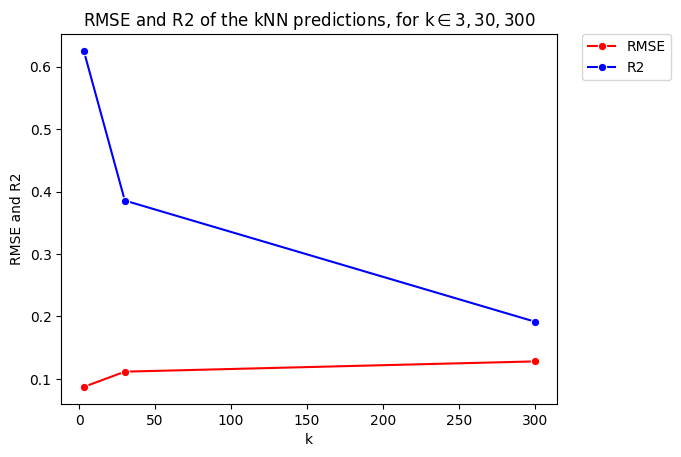

In [46]:
# Visualize results
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=rmse_values, color='r', marker='o', label = 'RMSE')
p2 = sns.lineplot(x=k_values, y=r2_values, color='b', marker='o', label = 'R2')

plt.title('RMSE and R2 of the kNN predictions, for k$\in{3,30,300}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('RMSE and R2')
plt.show()

### Model Optimization - kNN Model Selection

In [47]:
# Set up a parameter grid
num_examples = len(X_train)
K = list(np.linspace(3, np.sqrt(num_examples), 10, dtype=int))
param_grid = {'n_neighbors': K}
param_grid

{'n_neighbors': [3, 6, 9, 12, 16, 19, 22, 25, 29, 32]}

In [48]:
# Perform grid search cross-validation
print('Running Grid Search...')

# Create a KNeighborsClassifier model object
model = KNeighborsRegressor()

# Run a grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the model on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [49]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'n_neighbors': 3}
Best cross-validation score:  0.5060777530832347


In [50]:
# Train the optimial kNN model

# Initialize the model object
model_best = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
model_best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
# Make predictions on the test data
probability_predictions = model_best.predict(X_test)[1]

# Make predictions on the test data using the predict() method 
predictions = model_best.predict(X_test)
predictions

array([0.82675874, 0.53696917, 0.90995703, 0.64691859, 0.61542763,
       0.73429384, 0.57668112, 0.80720097, 0.78236306, 0.70277377,
       0.6776251 , 0.78121726, 0.78192864, 0.73634778, 0.66323833,
       0.78460765, 0.63732564, 0.93354581, 0.58927735, 0.44794807,
       0.63725591, 0.62017264, 0.63622489, 0.91922396, 0.80511377,
       0.67500297, 0.87545482, 0.72897459, 0.48914789, 0.8865217 ,
       0.57940582, 0.76670027, 0.84123006, 0.73436946, 0.78979655,
       0.67862795, 0.58901337, 0.54580482, 0.67227193, 0.88627676,
       0.77840461, 0.74444231, 0.72684137, 0.84028653, 0.92428839,
       0.93316599, 0.71055671, 0.56485963, 0.83777807, 0.80270227,
       0.90646452, 0.75017736, 0.82507265, 0.64947946, 0.55441092,
       0.32135546, 0.91695795, 0.68221885, 0.91779753, 0.72099032,
       0.67494341, 0.7891767 , 0.7871307 , 0.78599534, 0.6500876 ,
       0.63660149, 0.72362723, 0.6715406 , 0.92660113, 0.88779086,
       0.4509724 , 0.71127512, 0.76754294, 0.65486376, 0.52739

In [52]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("Test RMSE with best parameters: ", rmse)
print("Test R2 with best parameters: ", r2)

Test RMSE with best parameters:  0.08724895604286495
Test R2 with best parameters:  0.6250103902741997


## Part 6: Conclude and Reflect

The optimized kNN regressor model has a very low RMSE, meaning its predictions are close to the actual values. However, its relatively low R² score indicates that it doesn’t explain much of the data’s variability. This suggests that while the kNN model is good at making accurate predictions, it may not fully capture the underlying patterns in the data.

kNN can work for regression tasks, but it often struggles with more complex data or when relationships between features and the target variable are intricate. If the model isn't fitting the data well, it might be worth exploring other regression models. Different models might better capture the relationships in the data and provide a better balance between prediction accuracy and explaining variability.

With more time, I would experiment with other models, adjust features, and fine-tune settings to improve the overall performance and find the best approach for the regression problem at hand.